# Training covnet network on MNIST images

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)
import numpy as np
from tensorflow.python.keras import models, layers, preprocessing
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils import to_categorical
import matplotlib.pyplot as plt

TensorFlow 2.x selected.
2.0.0


## MNIST data set

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

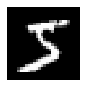

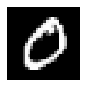

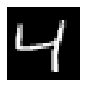

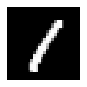

In [3]:
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.axis('off')
  plt.show()

## CovNet model

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# Adding classifier on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

## preprocessing data

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') /255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') /255

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Training

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 57s 958us/sample - loss: 0.1711 - accuracy: 0.9469
Epoch 2/5
60000/60000 [==============================] - 55s 912us/sample - loss: 0.0469 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 56s 932us/sample - loss: 0.0323 - accuracy: 0.9901
Epoch 4/5
60000/60000 [==============================] - 56s 938us/sample - loss: 0.0243 - accuracy: 0.9926
Epoch 5/5
60000/60000 [==============================] - 55s 915us/sample - loss: 0.0189 - accuracy: 0.9938


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================